In [1]:
import numpy as np
from numpy.random import multivariate_normal as mvnrnd
import matplotlib.pyplot as plt
import control

In [2]:
# System Description
a = np.array([[-0.3,-0.02],[1,0]])
b = np.array([[1],[0]])
c = np.array([[-0.12,0.06]])
d = np.array([[0]])
n, m = b.shape  # State-vector and control sizes
p = c.shape[0]  # Output vector size

dt = 0.1
T = np.arange(0, 50 + dt, dt)  # Time vector for simulation
x0 = np.array([[-3], [3]])

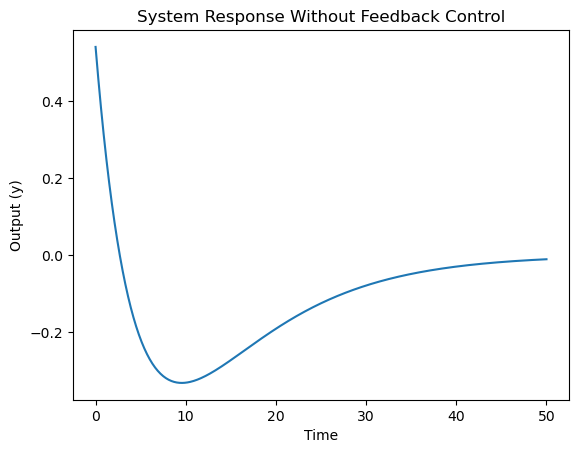

In [3]:
# Simulation Without Control
x = x0
u = np.array([[0]])
xs = []
ys = []
for i in range(len(T)):
    t = T[i]
    
    # output
    y = c @ x + d @ u
    
    # save
    xs.append(x)
    ys.append(y.item())
    
    # update x
    dx = dt * (a @ x + b @u)
    x = x + dx

# Plot the output 'ys'
plt.plot(T, ys)
plt.xlabel('Time')
plt.ylabel('Output (y)')
plt.title('System Response Without Feedback Control')
plt.show()

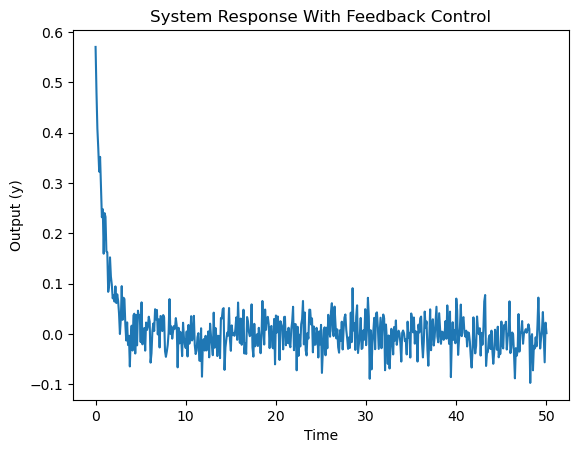

In [5]:
# Design State Feedback Controller
Q = np.eye(n)  # Weight on state feedback
R = 0.01 * np.eye(m)  # Input weight
K, _, _ = control.lqr(a, b, Q, R)

# Design Kalman Filter
Bnoise = np.eye(n)  # Process noise enters directly on states
W = 0.001 * np.eye(n)  # Process noise weight
V = 0.001 * np.eye(m)  # Measurement noise weight
Kf, _, _ = control.lqe(a, Bnoise, c, W, V)

x = x0
xhat = x0
u = np.array([[0]])
xs = []
ys = []
for i in range(len(T)):
    t = T[i]

    # Output
    measurement_noise = mvnrnd(np.zeros(p), V).reshape(-1,1)
    y = c @ x + d @ u + measurement_noise

    # Save
    xs.append(x)
    ys.append(y.item())

    # Kalman
    dxhat = dt * (a @ xhat + b @ u + Kf @ (y - c @ xhat - d @ u))
    xhat = xhat + dxhat

    # LQR
    u = -K @ xhat

    # Update x
    process_noise = mvnrnd(np.zeros(n), W).reshape(-1,1)
    dx = dt * (a @ x + b @ u + Bnoise @ process_noise)
    x = x + dx

# Plot the output 'ys'
plt.plot(T, ys)
plt.xlabel('Time')
plt.ylabel('Output (y)')
plt.title('System Response With Feedback Control')
plt.show()